# Titanic Data Analysis

Matthew Carter

## Contents

1. [Introduction](#intro)<br>
2. [Read in Titanic training set data](#readIn)<br>
3. [Initial dataset exploration](#initExplore)<br>
4. [Boarding the Titanic](#boarding)<br>
5. [About the passengers](#about)<br>
    5.1 [Gender](#aboutGender)<br>
    5.2 [Age](#aboutAge)<br>
    5.3 [Travel companions](#aboutComp)<br>
    5.4 [Travel class and fares](#aboutClassFare)<br>
6. [Survival](#survival)<br>
    6.1 [Gender](#survivalGender)<br>
    6.2 [Age](#survivalAge)<br>
    6.3 [Class](#survivalClass)<br>
7. [Summary](#summary)<br>
8. [Next steps](#next)<br>

## 1. Introduction <a id="intro"></a>

On the 15th April 1912 the Titanic, which was on her maiden voyage from Southampton to New York City, sank after hitting an iceberg in the North Atlantic Ocean. 

In this project I analyse the Titanic training set data from Kaggle. It contains basic information about a number of passengers including their name, age, gender, travelling class and whether the passengers survived the tragedy. I have chosen only to use the training set data in this analysis rather than combining it with the test set because I intend on using the latter in another project, in which I will create a machine learning model to predict survivors from the disaster. As a result any findings are related to the training set alone and may not represent the general demographics of the Titanic.  

## 2. Read in Titanic training set data <a id="readIn"></a>

In [1]:
# Import the required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the appearance of plots.
plt.style.use('ggplot')

Load the dataset into a Pandas DataFrame.

In [2]:
titanic_train_df = pd.read_csv('train.csv')

## 3. Initial dataset exploration <a id="initExplore"></a>

Display a sample from the top of the DataFrame to get an idea of what the data looks like.

In [3]:
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The snippet above gives a good idea of what data is available, but what are the dimensions of this dataset overall?  

In [4]:
titanic_train_df.shape

(891, 12)

There are 891 rows and 12 columns in the DataFrame.

Now to find out what type of data is in the DataFrame and whether there are any missing values.

In [5]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


There are a mixture of integer, float and object (columns with mixed strings and/or numbers) data types in this DataFrame. There seem to be three columns ('Age', 'Cabin' and 'Embarked') that do not have the full complement of 891 entries. These columns seem to contain null values.

In [6]:
titanic_train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This confirms that there are indeed 177 null entries in 'Age', 687 null in 'Cabin' and 2 null in 'Embarked'. By combining null and corresponding non-null value totals for these columns, we get the total 891 entries expected in each.

## 4. Boarding the Titanic <a id="boarding"></a>

Let's start with where these passengers boarded.

In [7]:
# Select the Embarked column and find the unique values within it.
titanic_train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

There appear to be three boarding locations for the Titanic (S=Southampton, C=Cherbourg, Q=Queenstown). The two NaN values were highlighted above.

How many passengers boarded at each location?

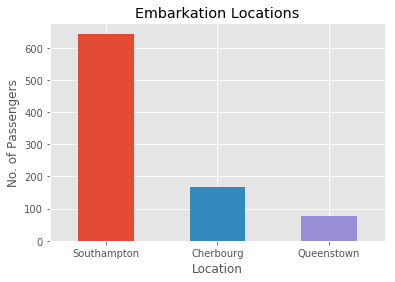

In [8]:
# Count the number of passengers boarding at each location and plot (NaN values are excluded by default).
titanic_train_df['Embarked'].value_counts().plot(kind='bar')
plt.title('Embarkation Locations')
plt.xlabel('Location')
plt.ylabel('No. of Passengers')
# Change the x tick labels on the plot from S, C, Q to Southampton, Cherbourg and Queenstown respectively.
loc = range(len(titanic_train_df['Embarked'].value_counts()))
labels = ['Southampton', 'Cherbourg', 'Queenstown']
plt.xticks(loc, labels, rotation='horizontal')
plt.show()

As expected the majority of people on-board in this dataset, over 600, embarked at Southampton, England, the starting point for the Titanic's maiden voyage. It then stopped at Cherbourg (France) and Queenstown (Ireland).

## 5. About the passengers <a id="about"></a>

### 5.1 Gender <a id="aboutGender"></a>

In this dataset, what was the gender split among those on the ship?

In [9]:
titanic_train_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [10]:
titanic_train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Almost 65% of passengers in this dataset were male, only 35% female.

### 5.2 Age <a id="aboutAge"></a>

What do we know of their ages?

In [11]:
titanic_train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The mean age of passengers in this dataset is just under 30. In fact 75% of the passengers were under 38, so there was a young population on-board. The minimum age shows that there were babies on-board. The oldest passenger, a far cry from the mean, was aged 80. 

This data can be visualised in a boxplot.

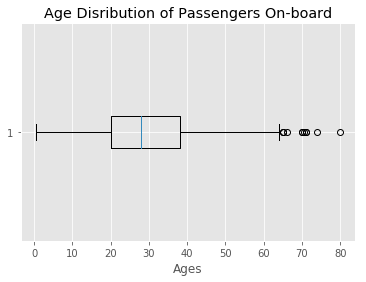

In [12]:
# Create a boxplot. The Age column contains NaN values which must be removed in order to create the boxplot. 
ages = titanic_train_df['Age'].dropna()
plt.boxplot(ages, vert=False)
plt.title('Age Disribution of Passengers On-board')
plt.xlabel('Ages')
plt.show()

The fairly small main box in this plot (inter-quartile range between ages 20 and 38) and the median at age 28, reflects a young adult population on-board. The lower whisker is also slightly shorter than the upper whisker, again reflecting a young population. The plot also shows a number of outliers beyond the upper whisker, suggesting that these older passengers are considered to be outside the 'norm'.

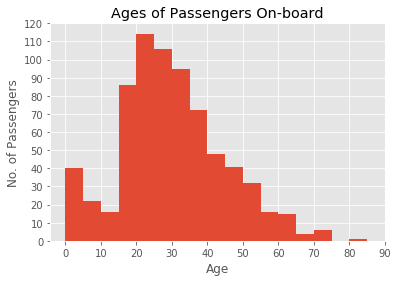

In [13]:
# As with the boxplot above NaN values must be removed for plotting the histogram to work.
ages = titanic_train_df['Age'].dropna()
bins = list(range(0, 90, 5))
# Plot histogram. Upper limit value of bins are not included, they fall into next bin up on histogram.
plt.hist(ages, bins=bins)
plt.xticks(range(0, 100, 10))
plt.yticks(range(0, 130, 10))
plt.title('Ages of Passengers On-board')
plt.xlabel('Age')
plt.ylabel('No. of Passengers')
plt.show()

The histogram appears to show a slightly right-skewed distribution which is indicative of the fairly young general age highlighted already.

There also seem to be a large number of under-5s. I'll investigate this age group further to see if there are more babies or toddlers.

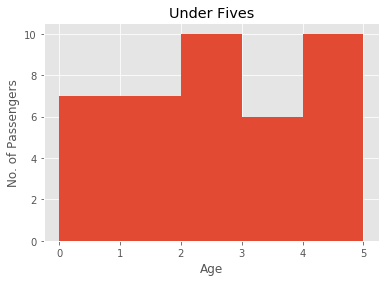

In [14]:
# Create a filter for passengers under five years old.
under_fives_filter = titanic_train_df['Age'] < 5
# Filter the train dataset.
under_fives_df = titanic_train_df[under_fives_filter]
# Plot the histogram.
bins = list(range(0, 6, 1))
plt.hist(under_fives_df['Age'], bins=bins)
plt.title('Under Fives')
plt.xlabel('Age')
plt.ylabel('No. of Passengers')
plt.show()

There does not appear to be any bias; the passenger numbers among under-5s are fairly evenly spread between babies and toddlers. 

Purely out of curiosity I'd like to find the oldest passenger(s), who as found earlier were eighty years old. 

In [15]:
# Filter the dataset for people aged eighty.
titanic_train_df[titanic_train_df['Age'] == 80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


So Mr Barkworth, a first class passenger travelling alone, appears to be the oldest passenger in this dataset. 

### 5.3 Travel companions <a id="aboutComp"></a>

Did passengers generally travel alone or with family? I'll start by finding the number of passengers travelling alone. These are passengers without siblings, spouses, parents or children on-board.

In [16]:
# SibSp = No. of siblings or spouses. Parch = No. of parents or children.
solo_passenger_filter = (titanic_train_df['SibSp'] == 0) & (titanic_train_df['Parch'] == 0) 
solo_passenger_df = titanic_train_df[solo_passenger_filter]
solo_passenger_df['PassengerId'].count()

537

537 of passengers in this dataset (60%) were travelling alone. I always imagined more people travelling with families or partners so this is a surprise to me.

What was the largest family size on-board?  

In [17]:
# Create a new DataFrame with passengers travelling alone removed (combine the two DataFrames and drop all duplicates).
party_passenger_df = pd.concat([titanic_train_df, solo_passenger_df], sort=False).drop_duplicates(keep=False)
# Create a new column in the DataFrame which is the sum of the SibSp and Parch columns. Then find the max value.
party_passenger_df['SibSp/Parch'] = party_passenger_df['SibSp'] + party_passenger_df['Parch']
party_passenger_df['SibSp/Parch'].max()

10

In this dataset, the largest family appears to have 11 members (max SibSp/Parch + the passenger themself). Who were they? 

In [18]:
largest_party_filter = party_passenger_df['SibSp/Parch'] == 10
party_passenger_df[largest_party_filter]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp/Parch
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,10
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,10
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,10


It appears that the Sage family are the largest in the train dataset (although the Sage surname could be common among passengers, the shared ticket suggests a family). Clearly all members of the Sage family are not shown above (only 7 of 11). These seem to be the Sage children (SibSp = 8 representing sibling number and Parch = 2 representing number of parents).

Out of curiosity, we can search the Name column in the original dataset to see if there are any other Sage's in this dataset.

In [19]:
# Search for name 'Sage'.
sage_name_filter = titanic_train_df['Name'].str.match("Sage")
# Filter DataFrame and output only the PassengerId and Name columns.
titanic_train_df[sage_name_filter][['PassengerId', 'Name']]

,PassengerId,Name
159,160,"Sage, Master. Thomas Henry"
180,181,"Sage, Miss. Constance Gladys"
201,202,"Sage, Mr. Frederick"
324,325,"Sage, Mr. George John Jr"
641,642,"Sagesser, Mlle. Emma"
792,793,"Sage, Miss. Stella Anna"
846,847,"Sage, Mr. Douglas Bullen"
863,864,"Sage, Miss. Dorothy Edith ""Dolly"""


It doesn't appear that there are any other Sage's in this dataset apart from members of the family (passenger ID 642 is not a Sage). They are all travelling third class, so was this a family holiday or were they possibly moving to America looking for a new start? 

#### A thoughtful side note
This is simple text and numerical data, but it is based on a tragic real life event and has given up part of the Sage family's story. It is sobering to see so many members of the same family perished. Starting this analysis I hadn't heard of the Sage's and without investigating this data I would likely know nothing about them. It shows how revealing and meaningful data can be.

### 5.4 Travel class and fares <a id="aboutClassFare"></a>

Which class did most passengers travel in?

In [20]:
# Count the number of passengers in each class.
class_passenger_count = titanic_train_df['Pclass'].value_counts()
# Obtain the relative frequencies of the unique values and convert them into a percentage.
percentage = titanic_train_df['Pclass'].value_counts(normalize=True).mul(100).round(1)
# Present in a DataFrame.
pd.DataFrame({'Count': class_passenger_count, 'Percentage of Total Passengers (%)': percentage})

,Count,Percentage of Total Passengers (%)
3,491,55.1
1,216,24.2
2,184,20.7


55% of passengers in the train dataset were travelling third class. This is more than double that of first class, the next highest group, and more than first and second classes combined.

Was there a relationship between gender and travelling class?

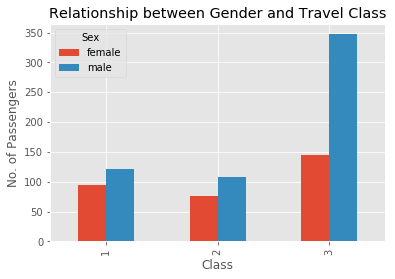

In [21]:
# Group data by class and gender.
class_gender_groups = titanic_train_df.groupby(['Pclass', 'Sex'])
# Perform count on groups (using count() rather than size() to exclude any missing values) then pivot the group data table 
# and plot a bar chart.
class_gender_groups['PassengerId'].count().unstack(fill_value=0).plot(kind='bar')
plt.title('Relationship between Gender and Travel Class')
plt.xlabel('Class')
plt.ylabel('No. of Passengers')
plt.show()

As shown earlier this dataset is almost two thirds male. The chart above reflects this with males outnumbering females in all classes. The standout is in third class, where the ratio of men to women is greater than 2:1.

What about age and travelling class?

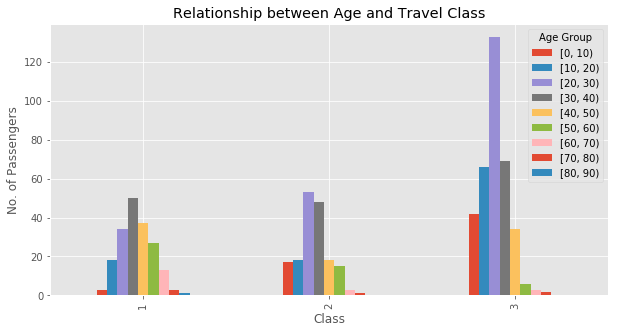

In [22]:
# Bin passengers into nine age groups (max age in dataset was 80) and create an Age Group column in the DataFrame.
bins = list(range(0, 100, 10))
titanic_train_df['Age Group'] = pd.cut(titanic_train_df['Age'], bins, right=False)
# Group data by class and age.
class_age_groups = titanic_train_df.groupby(['Pclass', 'Age Group'])
# Perform count on groups then pivot the group data table and plot a bar chart.
class_age_groups['PassengerId'].count().unstack(fill_value=0).plot(kind='bar', figsize=(10, 5))
plt.title('Relationship between Age and Travel Class')
plt.xlabel('Class')
plt.ylabel('No. of Passengers')
plt.show()

There is a clear difference between age distributions of the first and third classes. First class appears to be more normally distributed, whereas third seems to be right-skewed. This shows an older general population in first class compared to third. Third class follows the general dataset trend of a younger population. Looking at this chart, the stand out age groups are the 0-10s and the 20-30s. Populations of both these age groups rise as the classes are descended. The 20-30s group rise significantly going from third highest in first class, to highest in second class, and far exceeding any other age group in third class. 

What were the minimum and maximum fares in each class?

In [23]:
# Group the data by passenger class and then aggregate data for the Fare column only. 
titanic_train_df.groupby('Pclass').Fare.agg(['min', 'max'])

,min,max
Pclass,,
1,0.0,512.3292
2,0.0,73.5000
3,0.0,69.5500


The most expensive fare in this dataset was 512.33 pounds (512 pounds and 7 shillings approx. using conversion 20 shillings = 1 pound) and is unsurprisingly a first class passenger. It appears that there isn't much of a difference in maximum fare between the second and third classes.

Each class appears to have a minimum fare of 0 pounds. Why is this? Are there are missing facts where data has been entered as 0, or were there passengers of each class who did not have to pay for tickets (e.g. workers, complimentary tickets etc.)?

In [24]:
# Filter out passengers who paid nothing for their ticket and sort the result by passenger class.
titanic_train_df[titanic_train_df['Fare'] == 0].sort_values(by=['Pclass'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,"[40, 50)"
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,NaN
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,"[30, 40)"
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,NaN
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,"[30, 40)"
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,NaN
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,NaN
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,NaN
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,NaN
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S,NaN


From this data alone it is hard to say why these passengers don't appear to have paid for a ticket. Four have a ticket described as 'LINE', perhaps workers (the Titanic belonged to White Star Line)? Other tickets run consecutively and all of these passengers seem to be travelling without any family members, so perhaps further arguments for some or all being workers. 

As most passengers in this dataset travelled in third class, I will investigate the class a little further.

In [25]:
# Filter for third class passengers and create a third class passenger DataFrame.
third_class_filter = titanic_train_df['Pclass'] == 3
third_class_df = titanic_train_df[third_class_filter]
# Return summarising statistics for Fare column.
third_class_df['Fare'].describe()

count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64

The 75th percentile shows that three quarters of third class passenger fares in this dataset were below 15.5 pounds (15 pounds and 10 shillings). The maximum fare in this class appears to be 69.55 pounds (69 pounds and 11 shillings), which as seen earlier was paid by the Sage family.

(Conversion: 20 shillings = 1 pound)

How many unique values are there in third class fares?

In [26]:
third_class_df['Fare'].nunique()

119

119 unique fares in a third class with 491 passengers is a large proportion. Why was this? Possibly size/facilities of the cabin, boarding destination, who/where the ticket was purchased from, currency valuations etc.

Looking at the Sage family and other group passengers, my intial interpretation of the data is that the Fare column represents the price paid for the ticket itself and not the price paid by the individual passenger. E.g. In the case of the Sage family, the ticket CA 2343 cost a total of 69.55 pounds (69 pounds and 11 shillings) and included the travel for all eleven family members. So despite each row in the Fare column for the Sage's showing 69.55 pounds, they didn't each pay this amount.

Given that the Sage family is the largest on-board and also therefore in third class, you would expect their ticket price to be the highest in their class (more passengers, higher cost). This appears to support my interpretation of the Fare column as theirs is indeed the highest in the class as shown earlier.

I am going to look at another third class fare to see if I can support my interpretation.

In [27]:
# Using the third_class_df DataFrame previously created containing only third class passengers, group by Ticket and Fare.
third_class_ticket_groups = third_class_df.groupby(['Ticket', 'Fare'])
# Get number of passengers associated with a ticket number and convert to DataFrame with a 'Count' column.
third_class_ticket_df = third_class_ticket_groups['PassengerId'].count().to_frame(name='Count').reset_index()
# Sort the DataFrame by the Count column in descending order. 
third_class_ticket_df.sort_values('Count', ascending=False).head(n=10)

,Ticket,Fare,Count
350,CA. 2343,69.5500,7
139,347082,31.2750,7
5,1601,56.4958,7
348,CA 2144,46.9000,6
143,347088,27.9000,6
60,3101295,39.6875,6
279,382652,29.1250,5
30,2666,19.2583,4
352,LINE,0.0000,4
287,4133,25.4667,4


Ticket CA 2343 is associated with the Sage family as we know. So taking ticket numbers 1601 and 2666 at random for further investigation into fares.

In [28]:
# Filter the third class dataframe for ticket numbers 1601 and 2666.
third_class_df[(third_class_df['Ticket'] == '1601') | (third_class_df['Ticket'] == '2666')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group
74,75,1,3,"Bing, Mr. Lee",male,32.00,0,0,1601,56.4958,NaN,S,"[30, 40)"
169,170,0,3,"Ling, Mr. Lee",male,28.00,0,0,1601,56.4958,NaN,S,"[20, 30)"
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.00,2,1,2666,19.2583,NaN,C,"[0, 10)"
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,"[0, 10)"
509,510,1,3,"Lang, Mr. Fang",male,26.00,0,0,1601,56.4958,NaN,S,"[20, 30)"
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,NaN
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,"[0, 10)"
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,NaN
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,NaN
838,839,1,3,"Chip, Mr. Chang",male,32.00,0,0,1601,56.4958,NaN,S,"[30, 40)"


Taking my assumption that the Fare column represents total ticket price, is there a common ticket price per person?

The ticket price per person of the 7 passengers travelling on ticket 1601 is 8.07 pounds (56.50/7). The ticket price per person of the 4 related passengers travelling on ticket 2666 is 4.81 pounds (19.25/7). The Sage's ticket price per person was 6.32 pounds (69.55/11). Although these sample values do not seem too far apart, there doesn't appear to be a common ticket price, so there are clearly a number of variables affecting ticket prices.

## 6. Survival <a id="survival"></a>

Finally to the main question. How many people in this dataset lived and how many died?

In [29]:
# Group by Survived column and perfom count on groups.
survived_count_df = titanic_train_df.groupby('Survived').agg({'PassengerId': 'count'}).rename(columns={'PassengerId':'Count'})
survived_count_df

,Count
Survived,
0,549
1,342


549 people (62%) of the passengers in this dataset died. 

To delve a little deeper into survival, I will plot percentages of those who survived by gender, age group and class. First I will create a function that can be used to return the relavant plots.

In [30]:
# Function to create plot. Parameter is name of column.
def survivor_percentage_plot(col_1):    
    # Group data by col_1 and Survived columns. Then perform count using the PassengerId column and rename the column Count.
    col1_survived_groups = titanic_train_df.groupby([col_1, 'Survived'])
    col1_survived_df = col1_survived_groups.agg({'PassengerId': 'count'}).rename(columns={'PassengerId':'Count'})
    
    # Calculate the percentages of people of each 'col_1' who lived and died. To do this perform another groupby on the 
    # col1_survived_df DataFrame and apply a function to calculate the percentages.
    col1_survived_percent_groups = col1_survived_df.groupby([col_1])
    col1_survived_percent_df = col1_survived_percent_groups.apply(lambda x: (x / float(x.sum())) * 100)
    
    # Convert from a MultiIndex to a RangeIndex by resetting the index of the DataFrame, thereby making col_1 and Survived
    # columns again rather than the index. Then set the col_1 column as the index.
    col1_survived_percent_df = col1_survived_percent_df.reset_index().set_index(col_1)
    
    # Filter for survivors only (=1) and plot the results.
    col1_survived_filter = col1_survived_percent_df['Survived'] == 1
    col1_survived_percent_df[col1_survived_filter]['Count'].plot(kind='bar')
    plt.title('Percentage of Passengers of each ' + col_1 + ' who Survived')
    plt.xlabel(col_1)
    plt.ylabel('% of Passengers in category')
    plt.show()

### 6.1 Gender <a id="survivalGender"></a>

What percentage of men and women survived? 

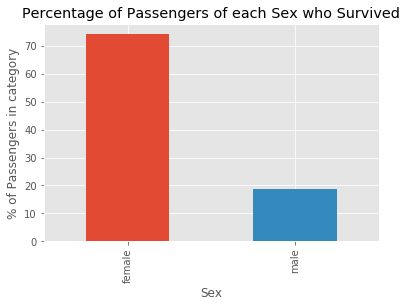

In [31]:
# Call function and pass in Sex column name to see survivors by gender.
survivor_percentage_plot('Sex')

A far larger proportion of women in this dataset survived, just over 70% compared to just under 20% of men (as identified earlier 65% of this dataset is male).

### 6.2 Age <a id="survivalAge"></a>

What percentage of each age group survived?

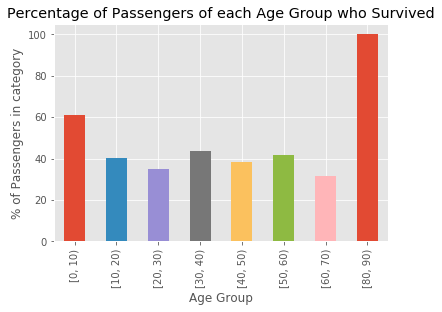

In [32]:
# Call function and pass in Age Group column name to see survivors by age group.
survivor_percentage_plot('Age Group')

From this plot of the train dataset, it appears that a fairly consistent percentage of people in each age group between 10 and 70 years old survived (approx. 30-40%). A larger percentage of children aged between 0-10 years of age survived, around 60%.  

It is worth remembering that as these are percentages of survivors per age group, a larger bar does not reflect a larger number of survivors when compared to another age group. For example the age section of this analysis showed that there was only one passenger aged 80. In this plot the 80-90 age group shows 100% survival, so he survived.

While the plot above displays the correct percentage of survivors in each age group, there is a missing age group (70-80). 
The data shows that there were no survivors in this age group, but this is not reflected on the chart. The approach below 
shows how this group can be included with an amendment to the code used in the survivor_percentage_plot() function.

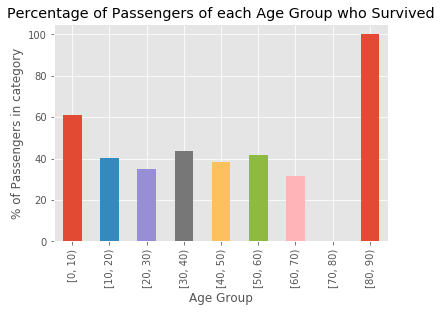

In [33]:
# Group data by Age Group and Survived columns. Then perform count using the PassengerId column and rename column Count.
agegrp_survived_groups = titanic_train_df.groupby(['Age Group', 'Survived'])
agegrp_survived_df = agegrp_survived_groups.agg({'PassengerId': 'count'}).rename(columns={'PassengerId':'Count'})

# Calculate the percentages of people of each Age Group who lived and died. To do this perform another groupby on the 
# agegrp_survived_df DataFrame and apply a function to calculate the percentages.
agegrp_survived_percent_groups = agegrp_survived_df.groupby(['Age Group'])
agegrp_survived_percent_df = agegrp_survived_percent_groups.apply(lambda x: (x / float(x.sum())) * 100)

# Create a MultiIndex and apply it to the agegrp_survived_percent_df DataFrame.
bins = list(range(0, 100, 10))
idx = pd.MultiIndex.from_product([np.unique(pd.cut(np.arange(90), bins, right=False)).tolist(), [0,1]], names=['Age Group', 'Survived'])
agegrp_survived_percent_df = agegrp_survived_percent_df.reindex(idx, fill_value=0)

# Convert from a MultiIndex to a RangeIndex by resetting the index of the DataFrame, thereby making Age Group and Survived
# columns again rather than the index. Then set the Age Group column as the index.
agegrp_survived_percent_df.reset_index(inplace=True)
agegrp_survived_percent_df.set_index('Age Group', inplace=True)

# Filter for survivors only (=1) and plot the results.
agegrp_survived_filter = agegrp_survived_percent_df['Survived'] == 1 
agegrp_survived_percent_df[agegrp_survived_filter]['Count'].plot(kind='bar')
plt.title('Percentage of Passengers of each Age Group who Survived')
plt.xlabel('Age Group')
plt.ylabel('% of Passengers in category')
plt.show()

### 6.3 Class <a id="survivalClass"></a>

Which class had the highest number of survivors?

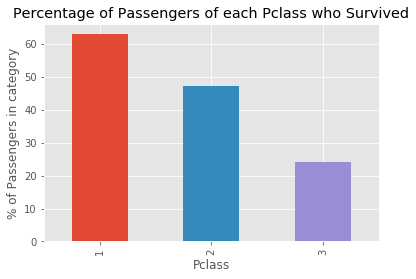

In [34]:
# Call function and pass in Pclass column name to see survivors by travelling class.
survivor_percentage_plot('Pclass')

The bar chart shows a decreasing percentage of survivors as we descend the classes from first to third. Over 60% of first class passengers in this dataset survived, a contrast when compared to just under 25% of third class passengers making it to safety. Recall that 55% of this dataset travelled in third class, indicating that a large number of lives were lost in this class. It could also suggest that upper classes were given priority when it came to getting to safety.

## 7. Summary <a id="summary"></a>

In this analysis I have looked at the Kaggle Titanic train dataset, which contains basic information on a large sample of passengers who were on-board when the ship sank in 1912. Before looking into the data itself, I investigated its structure. Then I went on to find out about those on-board and finally looked at how many survived.

The passengers in the train dataset were young, with 75% under thirty-eight years of age. The on-board population was also largely male (65%). 55% of passengers travelled in third class. Over half of the passengers were travelling alone (60%), and among those who weren't the largest group travelling together contained 11 passengers. 


62% of passengers in this dataset died. When it came to survival it appears that women, children and the upper classes stood a better chance. Over 70% of women in this dataset survived, compared to around 20% of the men. More than 60% of the first class passengers lived, a stark contrast to the fortunes of the third class where just under 25% survived. There wasn't much variation in survival percentages between the various passenger age groups, though children under ten had a higher percentage than most at approximately 60%. The only group higher was the 80-90s, but there was only one passenger in this group.

## 8. Next steps <a id="next"></a>

I am always looking to learn and to find better ways of doing things, so I'd appreciate any feedback on the analysis I've done here. I have intentionally made a lot of comments in my code and in places haven't made the code as concise as it could have been (such as when grouping or using filters). This was intentional as I would like to make it readable and understandable to others and for my own future reference. I would also welcome suggestions for other things I could look into and try on future projects.

In the next part I will create a machine learning model and using the Kaggle test dataset attempt to predict the survivors of the Titanic disaster.